## COVID-19 Analysis

#### Get the data set [here:](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset)
The data is updated on 8th March 2020

The purpose of this particular file is to extract country wise and state wise distribution of the COVID-19 Cases

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [41]:
df=pd.read_csv('covid_19_data.csv')
df.shape

(3992, 8)

In [42]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [43]:
df = df.rename(columns={'ObservationDate': 'Date','Province/State': 'State','Country/Region': 'Country'})
df.head()

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [44]:
df=df.drop(['Last Update','SNo'], axis=1)
df.head()

,Date,State,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


Collecting overview about updated total confirmed cases, deaths and recovered cases in each country

In [45]:
df1=df.loc[df['Date'] == '03/06/2020'] # Collecting the data updated on 6th March 2020
df1=df1.drop(['Date'], axis=1)
df1.head()

,State,Country,Confirmed,Deaths,Recovered
3568,Hubei,Mainland China,67592.0,2931.0,42033.0
3569,NaN,South Korea,6593.0,42.0,135.0
3570,NaN,Iran,4747.0,124.0,913.0
3571,NaN,Italy,4636.0,197.0,523.0
3572,Guangdong,Mainland China,1352.0,7.0,1216.0


In [59]:
df2=df1[['Country','Confirmed','Deaths','Recovered']]
df2.head()

,Country,Confirmed,Deaths,Recovered
3568,Mainland China,67592.0,2931.0,42033.0
3569,South Korea,6593.0,42.0,135.0
3570,Iran,4747.0,124.0,913.0
3571,Italy,4636.0,197.0,523.0
3572,Mainland China,1352.0,7.0,1216.0


In [62]:
print('Total Confirmed:', df2['Confirmed'].sum())
print('Total Deaths:', df2['Deaths'].sum())
print('Total Recovered:', df2['Recovered'].sum())

Total Confirmed: 101800.0
Total Deaths: 3460.0
Total Recovered: 55866.0


In [66]:
#df2.to_excel("updated_covid19.xlsx",index=False)

In [82]:
df3=df2.groupby(['Country'],as_index=False).sum()
df3.head(10)

,Country,Confirmed,Deaths,Recovered
0,Afghanistan,1.0,0.0,0.0
1,Algeria,17.0,0.0,0.0
2,Andorra,1.0,0.0,0.0
3,Argentina,2.0,0.0,0.0
4,Armenia,1.0,0.0,0.0
5,Australia,60.0,2.0,21.0
6,Austria,55.0,0.0,0.0
7,Azerbaijan,6.0,0.0,0.0
8,Bahrain,60.0,0.0,4.0
9,Belarus,6.0,0.0,0.0


In [88]:
df3.sort_values(['Confirmed'],ascending=False,inplace=True)
df3.reset_index(drop=True)
df3.head(10)

,Country,Confirmed,Deaths,Recovered
53,Mainland China,80573.0,3042.0,53888.0
84,South Korea,6593.0,42.0,135.0
39,Iran,4747.0,124.0,913.0
43,Italy,4636.0,197.0,523.0
65,Others,696.0,6.0,40.0
31,Germany,670.0,0.0,17.0
29,France,653.0,9.0,12.0
44,Japan,420.0,6.0,46.0
85,Spain,400.0,5.0,2.0
94,US,278.0,14.0,8.0


In [90]:
#df3.to_excel("updated_covid19.xlsx",index=False)

In [106]:
df3["Recovery Rate"]=df3["Recovered"]/df3["Confirmed"]*100
df3.head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
53,Mainland China,80573.0,3042.0,53888.0,3.775458,66.880965
84,South Korea,6593.0,42.0,135.0,0.637039,2.047626
39,Iran,4747.0,124.0,913.0,2.612176,19.233200
43,Italy,4636.0,197.0,523.0,4.249353,11.281277
65,Others,696.0,6.0,40.0,0.862069,5.747126
31,Germany,670.0,0.0,17.0,0.000000,2.537313
29,France,653.0,9.0,12.0,1.378254,1.837672
44,Japan,420.0,6.0,46.0,1.428571,10.952381
85,Spain,400.0,5.0,2.0,1.250000,0.500000
94,US,278.0,14.0,8.0,5.035971,2.877698


In [107]:
df3["Mortality Rate"]=df3["Deaths"]/df3["Confirmed"]*100
df3.head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
53,Mainland China,80573.0,3042.0,53888.0,3.775458,66.880965
84,South Korea,6593.0,42.0,135.0,0.637039,2.047626
39,Iran,4747.0,124.0,913.0,2.612176,19.233200
43,Italy,4636.0,197.0,523.0,4.249353,11.281277
65,Others,696.0,6.0,40.0,0.862069,5.747126
31,Germany,670.0,0.0,17.0,0.000000,2.537313
29,France,653.0,9.0,12.0,1.378254,1.837672
44,Japan,420.0,6.0,46.0,1.428571,10.952381
85,Spain,400.0,5.0,2.0,1.250000,0.500000
94,US,278.0,14.0,8.0,5.035971,2.877698


In [119]:
df3.to_excel("updated_covid19.xlsx",index=False) # making dataset with country wise distribution of COVID-19 cases

In [120]:
df3.describe()

,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
count,99.000000,99.000000,99.000000,99.000000,99.000000
mean,1028.282828,34.949495,564.303030,0.661357,10.506186
std,8129.555323,306.214356,5414.956139,2.332094,24.432657
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000,0.000000,0.000000
75%,46.500000,0.000000,2.000000,0.000000,6.666667
max,80573.000000,3042.000000,53888.000000,20.000000,100.000000


In [91]:
import seaborn as sns

[Text(0, 0, 'Mainland China'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'US')]

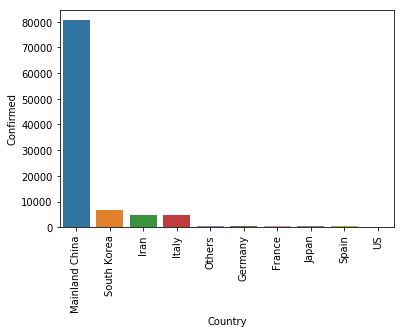

In [102]:
ax = sns.barplot(x="Country", y="Confirmed", data=df3.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Mainland China'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'US')]

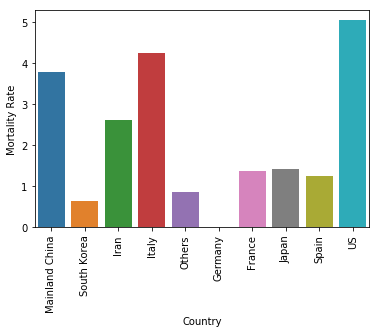

In [105]:
ax = sns.barplot(x="Country", y="Mortality Rate", data=df3.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Deaths')

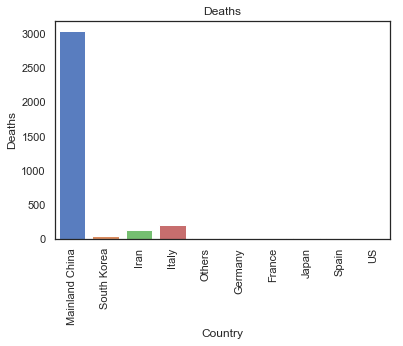

In [112]:
ax = sns.barplot(x="Country", y="Deaths", data=df3.head(10))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Deaths")

In [108]:
sns.set(style="white", palette="muted", color_codes=True)

[Text(0, 0, 'Mainland China'),
 Text(0, 0, 'South Korea'),
 Text(0, 0, 'Iran'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'US')]

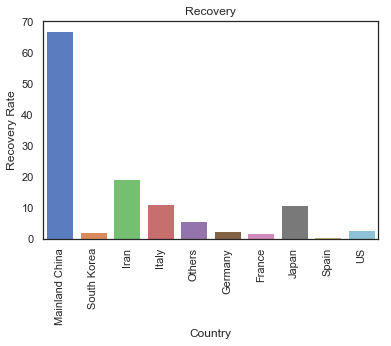

In [118]:
ax=sns.barplot(x="Country", y="Recovery Rate", data=df3.head(10))
ax.set_title("Recovery")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [135]:
df_state=df1[['Country','State','Confirmed','Deaths','Recovered']]
df_state.head(10)

,Country,State,Confirmed,Deaths,Recovered
3568,Mainland China,Hubei,67592.0,2931.0,42033.0
3569,South Korea,NaN,6593.0,42.0,135.0
3570,Iran,NaN,4747.0,124.0,913.0
3571,Italy,NaN,4636.0,197.0,523.0
3572,Mainland China,Guangdong,1352.0,7.0,1216.0
3573,Mainland China,Henan,1272.0,22.0,1244.0
3574,Mainland China,Zhejiang,1215.0,1.0,1147.0
3575,Mainland China,Hunan,1018.0,4.0,955.0
3576,Mainland China,Anhui,990.0,6.0,979.0
3577,Mainland China,Jiangxi,935.0,1.0,909.0


In [143]:
df_s=df_state.fillna('state0') #substituting the NaN with 'state0' for all the NaNs in State column

In [144]:
df_s.to_excel("updated_covid19_states.xlsx",index=False) # making data set with state wise distribution of COVID-19 cases